# Result details:

**Category #1: Modelling using only boosting techniques:**
- best private score (Kaggle): 0.9442
- best public score (Kaggle): 0.9402 

# Importing the required packages

In [2]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.1 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.7 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from scipy.stats import uniform, truncnorm, randint

import imblearn

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
import matplotlib as mpl

pd.set_option('display.max_columns', None)
%matplotlib inline
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline

RANDOM_STATE = 42

# Importing the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#train_path = '/content/gdrive/MyDrive/Data_mining/HW3/Kannada-MNIST/train.csv'
#test_path = '/content/gdrive/MyDrive/Data_mining/HW3/Kannada-MNIST/test.csv'

In [6]:
train_path = 'Kannada-MNIST/train.csv'
test_path = 'Kannada-MNIST/test.csv'

In [7]:
train_df = pd.read_csv(train_path, sep=',')
test_df = pd.read_csv(test_path, sep=',')

In [8]:
# Take a quick look on the imported data:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [ ]:
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pi

In [ ]:
print(f'The train dataset consists of {train_df.shape[0]} records and {train_df.shape[1]} attributes.')
print(f'The test dataset consists of {test_df.shape[0]} records and {test_df.shape[1]} attributes.')

The train dataset consists of 60000 records and 785 attributes.
The test dataset consists of 5000 records and 785 attributes.


In [ ]:
# This section was used only for testing the functions:

#train_df = train_df.sample(frac = 1)
#train_df = train_df.iloc[:2000, :200]
#train_df

# Category #1 : Parameter optimization for boosting methods

## XGBBoost

Boosting methods are allowed only in this part of the competition. Therefore, I chose XGBoost at first approach, since it has fairly a lot of parameters to tune, additionally it regularly provides a good performance.

**Remark:** I will use cross-validation to test the performance of the model. As a result, I do not necessarily see the need for splitting up the data to a `train` and a `validation` set. The accuracy obtained with cross-validation regularly represents the real performance of the model very well. However, I will anyway make a small validation set in the beginning, since I received suspiciously good results without any hyperparameter optimization and I wanted to make sure, that I did not make any major mistake.

In [ ]:
y = train_df['label']
X = train_df.drop('label', axis = 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = RANDOM_STATE)

Let's just quickly set up the `XGBClassifier` and test the performance with default parameters:

In [ ]:
#model = RandomForestClassifier()
start_time = time.time()
model = XGBClassifier()
model.fit(X_train, y_train, eval_set =[(X_val, y_val)], early_stopping_rounds=10)
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with default configuration took " + str(total_time_rf) + " s.")
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))

C:\Users\AVA2BP\.conda\envs\custom_environment\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.31676
[1]	validation_0-mlogloss:0.98485
[2]	validation_0-mlogloss:0.77447
[3]	validation_0-mlogloss:0.62678
[4]	validation_0-mlogloss:0.51756
[5]	validation_0-mlogloss:0.43422
[6]	validation_0-mlogloss:0.37047
[7]	validation_0-mlogloss:0.31862
[8]	validation_0-mlogloss:0.27842
[9]	validation_0-mlogloss:0.24593
[10]	validation_0-mlogloss:0.21932
[11]	validation_0-mlogloss:0.19763
[12]	validation_0-mlogloss:0.17987
[13]	validation_0-mlogloss:0.16469
[14]	validation_0-mlogloss:0.15295
[15]	validation_0-mlogloss:0.14207
[16]	validation_0-mlogloss:0.13300
[17]	validation_0-mlogloss:0.12487
[18]	validation_0-mlogloss:0.11810
[19]	validation_0-mlogloss:0.11195
[20]	validation_0-mlogloss:0.10678
[21]	validation_0-mlogloss:0.10221
[22]	validation_0-mlogloss:0.09782
[23]	validation_0-mlogloss:0.09342
[24]	validation_0-mlogloss:0.09019
[25]	validation_0-mlogloss:0.08738
[26]	validation_0-mlogloss:0.08433
[27]	validation_0-mlogloss:0.08165
[28]	validation_0-mlogloss:0.0

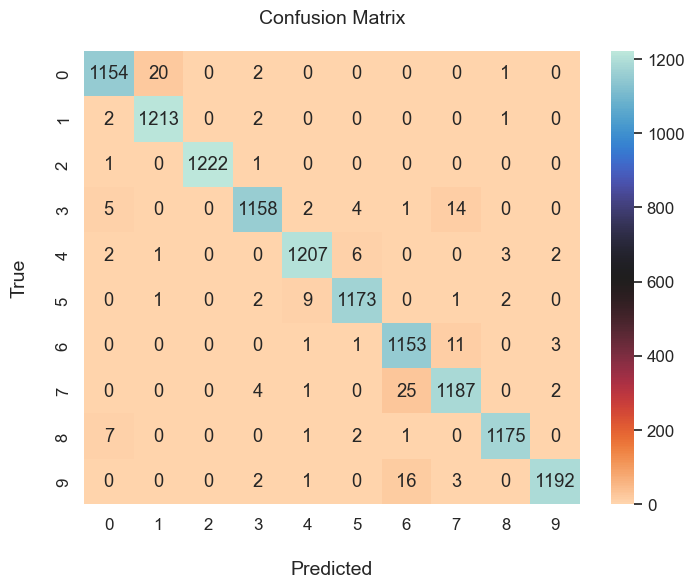

In [ ]:
# Calculating the confusion matrix:
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6), dpi=100)
sns.set_context("talk")
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="icefire_r")
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("True", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

**Results:** Wow! Surprisingly, we have obtained very high accuracy score with a default model. Honestly speaking, I would be cautious with these results, I did not expect such high accuracy score. I might have made a mistake with the data. Let's keep this in mind.

For the sake of safety, I'll check this also with cross-validation to make sure, that we again receive a very high accuracy value.

In [ ]:
# Setting the cross-validation type
# Do not forget to change the number of folds!!!

#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
kfold = 3

In [ ]:
start_time = time.time()
model = XGBClassifier()
cv_results = cross_validate(model, X_train, y_train, scoring = 'accuracy', cv = kfold)
cv_accuracy = cv_results['test_score'].mean()
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with default configuration using CV took " + str(total_time_rf) + " s.")
print(f'The obtained accuracy is {cv_accuracy}')

Training of the XGBoost with default configuration using CV took 526.2447538375854 s.
The obtained accuracy is 0.9829791666666666


**Results:** Again, we have obtainen very high accuracy (***0.983***) values even using cross-validation. This makes me more convinced, that there was no major mistake previously.

### Selection of parameters, that shall be fine-tuned

First, we will identify those parameters, which would worth to be tuned.

**The ultimate goal is to make a grid search with the help of the chosen parameters.**

Before doing that, we need to get an impression, which parameters have an effect on the ***accuracy***, and in which range we need to perform the grid search, so that we can find the most appropriate, optimal parameters.

In [ ]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

After analyzing the available literature, I decided to select the follwing parameters from the above listed ones and start with the following ranges:
- max_depth: 3 - 10
- n_estimators: 50 - 500
- learning_rate(eta): 0.01-0.2
- colsample_bytree: 0.5 - 1
- subsample: 0.5 - 1
- reg_alpha: 0 - 100 (allowed range: 0 to inf)
- reg_lambda: 0 - 100 (allowed range: 0 to inf)
- gamma: 0-100 (allowed range: 0 to inf)

### RandomizedSearch for getting  an impression on the effect of the paramters

Due to the limited computational resources, it is needed to first establish an impression on what are those parameter ranges, that we need to use during the grid search, to get the best possible accuracy.

Therefore, as a first step, I will use the RandomSearchCV, which does not try out all parameter combinations, but a fixed number of parameter settings are sampled from the given distribution/list. This gives us the opportunity to get a rough idea, what is the order of magnitude for each parameter, with which we need to experiment with. At first, broad parameter intervals are defined, which will be narrowed down after all.

Let's define the set of parameters, that we want to use for the random search:

In [ ]:
random_params = {
    'learning_rate' : uniform(0.01, 0.199),
    'max_depth' : randint(2, 12),
    'n_estimators' : randint(50, 500),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'reg_alpha': randint(0, 100),
    'reg_lambda': randint(0, 100),
    'gamma': randint(0, 100),
}

In [ ]:
# Create the model used for the random search
xgb_model = XGBClassifier(verbosity = 0)

# Set up random search meta-estimator
clf = RandomizedSearchCV(xgb_model, random_params, n_iter=10, cv = kfold, random_state = RANDOM_STATE)

# Train the random search meta-estimator to find the best model out of all candidates
model = clf.fit(X_train, y_train)

C:\Users\Adam\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Adam\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Adam\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y

In [ ]:
results_df = pd.DataFrame(model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,178.757857,2.581868,0.257295,0.009842,0.591118,3,0.0720305,7,103,3,53,0.515657,"{'colsample_bytree': 0.5911180438940311, 'gamm...",0.958937,0.962688,0.959187,0.960271,0.001712,1
2,475.402545,6.806387,0.387672,0.018220,0.969276,1,0.0461832,6,210,75,57,0.762378,"{'colsample_bytree': 0.9692763545078751, 'gamm...",0.950750,0.954750,0.951937,0.952479,0.001677,2
4,687.520192,35.400804,0.234301,0.008499,0.892588,50,0.0861099,5,369,2,50,0.840154,"{'colsample_bytree': 0.8925879806965068, 'gamm...",0.931750,0.936500,0.936063,0.934771,0.002144,3
3,731.479871,24.072390,0.221650,0.017268,0.715973,48,0.11443,11,237,79,14,0.728035,"{'colsample_bytree': 0.7159725093210578, 'gamm...",0.915125,0.921625,0.918250,0.918333,0.002654,4
6,1075.525152,3.471930,0.289308,0.017509,0.620513,59,0.0342856,9,480,34,77,0.69553,"{'colsample_bytree': 0.6205127330130058, 'gamm...",0.915625,0.918312,0.917937,0.917292,0.001188,5
5,303.223009,2.292407,0.200291,0.004493,0.72525,17,0.198828,3,314,89,52,0.615447,"{'colsample_bytree': 0.7252496259847715, 'gamm...",0.913625,0.917937,0.916125,0.915896,0.001768,6
8,599.888206,2.737149,0.271413,0.101021,0.921142,43,0.19696,5,319,94,47,0.66327,"{'colsample_bytree': 0.9211423872974993, 'gamm...",0.909188,0.912937,0.913062,0.911729,0.001798,7
1,232.125090,2.194602,0.208989,0.000819,0.729624,99,0.0384305,4,199,52,1,0.860999,"{'colsample_bytree': 0.7296244459829335, 'gamm...",0.905813,0.910687,0.909062,0.908521,0.002027,8
9,412.273417,8.084726,0.244968,0.019615,0.785222,61,0.0747407,3,416,52,23,0.678377,"{'colsample_bytree': 0.7852219872026998, 'gamm...",0.904125,0.909500,0.907875,0.907167,0.002251,9
0,596.508589,28.982063,0.226325,0.009565,0.68727,92,0.0465035,9,238,20,82,0.549987,"{'colsample_bytree': 0.6872700594236812, 'gamm...",0.893437,0.898000,0.897750,0.896396,0.002094,10


**Conclusion:**
- One major outcome of this random search was, that although only 10 iterations were performed, it took more than 4 hours to complete this step, which is way too much time. On the top of that, I was unable to derive a clear conclusion from the obtained results regarding the optimal parameter intervals. The only rough feeling that I have is using high regularization values deteriorates the performance (especially high gamma (50 - ) values resulted in bad performance). When all regularization parameters (`gamma`, `reg_lambda`, `reg_alpha`) were high, the results were fairly bad.

**Options to continue with:**
- My first priority was to somehow reduce the runtime of the randomsearch. The followings were tried:
  - I used a smaller `max_depth` (2 - 5), which although helped a bit, it did improve that remarkably.
  - Larger `learning_rate` (0.2 - ) was also checked. I realized, that this also does not improve the runtime that much, however, the performance of the models were improved a bit!
  - Adding `early_stopping_rounds` in the fit method did not improve either.
  - I do not have much opportunities as far as the GPU is concerned, therefore this is not an option for me.
- **As a result, I decided, that I will use only the subset of the data to speed up the random search. I will take only 500 records from each class. This used subset of the data contains only 5000 records, which is 1/12 of the orignal dataset.**  

### Generating the limited dataset

500 samples are taken from each class uniformly. This will result in a dataset consisting of 5000 records.

In [ ]:
n_sample = 500
sampling_strat = {}

for i in train_df.label.unique():
    sampling_strat[i] = n_sample
    
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=sampling_strat, random_state=42, replacement=False)

In [ ]:
X_limited, y_limited = rus.fit_resample(X_train, y_train)

First, let's try, what performance do we get with this limited dataset:

In [ ]:
start_time = time.time()
model = XGBClassifier()
cv_results = cross_validate(model, X_limited, y_limited, scoring = 'accuracy', cv = kfold)
cv_accuracy = cv_results['test_score'].mean()
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with default configuration using CV took " + str(total_time_rf) + " s.")
print(f'The obtained accuracy is {cv_accuracy}')

Training of the XGBoost with default configuration using CV took 46.1207013130188 s.
The obtained accuracy is 0.9529999162232379


Despite the fact, that we significantly reduced the size of the dataset used for fitting the models, the performance did not drop too much (0.983 --> 0.953). This makes me more confident, that this is the way to follow.

Now let's define the set of parameters, that we want to use for the random search:

In [ ]:
random_params = {
    'learning_rate' : uniform(0.5, 0.5),
    'max_depth' : randint(2,8),
    'n_estimators' : randint(50, 500),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'reg_alpha': randint(0, 100),
    'reg_lambda': randint(0, 100),
    'gamma': randint(0, 100),
}

In [ ]:
start_time = time.time()

# Create the model used for the random search
xgb_model = XGBClassifier(verbosity = 0)

# Set up random search meta-estimator
clf = RandomizedSearchCV(xgb_model, random_params, n_iter=10, cv = kfold, random_state = RANDOM_STATE)

# Train the random search meta-estimator to find the best model out of all candidates
model = clf.fit(X_limited, y_limited)

end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with default configuration took " + str(total_time_rf) + " s.")

Training of the XGBoost with default configuration took 1234.6180202960968 s.


Finally, the results of the various models are ranked:

In [ ]:
results_df = pd.DataFrame(model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,17.698379,0.205552,0.057145,0.003521,0.62939,3,0.655856,7,103,3,53,0.515657,"{'colsample_bytree': 0.6293899908000085, 'gamm...",0.909418,0.904619,0.912965,0.909001,0.003420,1
2,10.976727,1.005245,0.052987,0.006588,0.969276,1,0.590912,6,210,75,57,0.762378,"{'colsample_bytree': 0.9692763545078751, 'gamm...",0.879424,0.873425,0.881753,0.878201,0.003508,2
5,9.953468,0.135977,0.054350,0.002166,0.72525,17,0.974443,5,63,8,89,0.548836,"{'colsample_bytree': 0.7252496259847715, 'gamm...",0.800240,0.801440,0.802521,0.801400,0.000932,3
4,73.141800,1.180709,0.049193,0.001586,0.892588,50,0.691231,5,369,2,50,0.840154,"{'colsample_bytree': 0.8925879806965068, 'gamm...",0.779844,0.755849,0.785114,0.773602,0.012737,4
6,67.204597,0.755625,0.053446,0.001102,0.842117,59,0.561019,6,313,46,34,0.95466,"{'colsample_bytree': 0.8421165132560784, 'gamm...",0.686863,0.688662,0.700480,0.692002,0.006040,5
9,77.309812,0.246889,0.052723,0.002426,0.785222,61,0.662665,6,387,52,23,0.678377,"{'colsample_bytree': 0.7852219872026998, 'gamm...",0.580684,0.630474,0.611645,0.607601,0.020527,6
3,24.306014,0.859816,0.053079,0.001560,0.715973,48,0.762387,3,237,79,14,0.728035,"{'colsample_bytree': 0.7159725093210578, 'gamm...",0.598080,0.611278,0.610444,0.606601,0.006034,7
1,23.951047,0.441228,0.041884,0.002794,0.933088,99,0.571433,4,199,52,1,0.860999,"{'colsample_bytree': 0.9330880728874675, 'gamm...",0.607678,0.612478,0.587035,0.602397,0.011038,8
8,83.946318,2.371170,0.062495,0.003978,0.921142,43,0.969749,7,319,94,47,0.66327,"{'colsample_bytree': 0.9211423872974993, 'gamm...",0.100180,0.100180,0.246098,0.148819,0.068787,9
0,13.182563,5.284898,0.058456,0.020653,0.68727,92,0.591717,6,70,82,86,0.529042,"{'colsample_bytree': 0.6872700594236812, 'gamm...",0.100180,0.100180,0.099640,0.100000,0.000255,10


**Conclusion:**

By using only the subset of the data, I've finally managed to reach a major improvement as far as the runtime is concerned: 4 hours -> ~20 minutes. However, there is still no very clear conclusion, into which direction I need to go with the parameters. The only thing, that is still visible is, that the high regularization values clearly have a bad effect on the performance (especially `gamma`).

**As a result, I will continue as follows: the limited subset will be used and I will select smaller regularization values. In the meantime, I will increase the number of iterations (10 --> 30), hoping that I will see more concrete tendencies in the parameters.**

Let's define the updated set of parameters, that we want to use for the random search! I've chosen smaller regularization values.

In [ ]:
random_params = {
    'learning_rate' : uniform(0.1, 0.5),
    'max_depth' : randint(2,8),
    'n_estimators' : randint(50, 500),
    'colsample_bytree': uniform(0.5, 0.5),
    'subsample': uniform(0.5, 0.5),
    'reg_alpha': uniform(0.1, 10),
    'reg_lambda': uniform(0.1, 10),
    'gamma': uniform(0.1, 5),
}

In [ ]:
start_time = time.time()

# Create the model used for the random search
xgb_model = XGBClassifier(verbosity = 0)

# Set up random search meta-estimator
clf = RandomizedSearchCV(xgb_model, random_params, n_iter=30, cv = kfold, random_state = RANDOM_STATE)

# Train the random search meta-estimator to find the best model out of all candidates
model = clf.fit(X_limited, y_limited)

end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with default configuration took " + str(total_time_rf) + " s.")

Training of the XGBoost with default configuration took 3727.517887353897 s.


Finally, the results of the various models are ranked:

In [ ]:
results_df = pd.DataFrame(model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,64.455909,0.799066,0.054313,0.011826,0.796207,0.332252,0.403772,6,378,0.750516,9.588855,0.982816,"{'colsample_bytree': 0.7962072844310213, 'gamm...",0.940612,0.949610,0.946579,0.945600,0.003738,1
2,44.886489,0.010707,0.048725,0.000677,0.590912,1.017023,0.252121,7,302,4.41945,3.012291,0.805926,"{'colsample_bytree': 0.5909124836035503, 'gamm...",0.943011,0.942412,0.944178,0.943200,0.000733,2
15,35.543840,0.309685,0.047788,0.001248,0.769921,1.115306,0.571427,4,292,1.712213,9.396977,0.90406,"{'colsample_bytree': 0.7699205456508366, 'gamm...",0.940012,0.934013,0.936975,0.937000,0.002449,3
5,25.821106,0.604043,0.050054,0.000358,0.904199,1.623069,0.148836,5,141,4.501525,1.320382,0.747588,"{'colsample_bytree': 0.9041986740582306, 'gamm...",0.938812,0.935813,0.936375,0.937000,0.001302,4
18,32.677052,0.301778,0.047635,0.001482,0.503476,2.653737,0.308706,6,274,1.298654,3.476152,0.971455,"{'colsample_bytree': 0.5034760652655954, 'gamm...",0.932813,0.937013,0.937575,0.935800,0.002125,5
10,14.720306,0.028680,0.051064,0.002266,0.697441,1.567441,0.10704,4,130,7.21342,8.001755,0.80298,"{'colsample_bytree': 0.6974407590877849, 'gamm...",0.937612,0.927415,0.933373,0.932800,0.004183,6
3,71.603360,0.467529,0.057663,0.015624,0.569747,1.560723,0.283181,7,495,7.95176,2.096738,0.757117,"{'colsample_bytree': 0.569746930326021, 'gamma...",0.935813,0.928014,0.932173,0.932000,0.003186,7
9,14.008949,0.156148,0.049318,0.000824,0.982628,3.135171,0.238,6,64,1.752669,0.256364,0.711701,"{'colsample_bytree': 0.982627653632069, 'gamma...",0.929814,0.926815,0.933373,0.930001,0.002681,8
26,68.201742,0.883684,0.046767,0.000648,0.829992,4.186111,0.3776,5,418,2.518523,1.031028,0.948608,"{'colsample_bytree': 0.8299920230170895, 'gamm...",0.933413,0.926815,0.927971,0.929400,0.002877,9
17,24.851219,0.070641,0.046650,0.000775,0.948046,1.690017,0.155026,2,332,4.371078,8.280148,0.930365,"{'colsample_bytree': 0.9480456499617467, 'gamm...",0.926815,0.927415,0.932173,0.928801,0.002397,10


In [ ]:
results_df.sort_values(by = ["rank_test_score"]).tail(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,54.420544,0.293080,0.046825,0.000249,0.908216,4.091726,0.175359,4,375,7.058128,8.683588,0.662979,"{'colsample_bytree': 0.908215936609692, 'gamma...",0.919016,0.910018,0.915966,0.915000,0.003736,21
13,61.603329,0.248433,0.046909,0.001274,0.880393,2.906386,0.485484,4,442,7.206629,1.208908,0.719668,"{'colsample_bytree': 0.8803925243084487, 'gamm...",0.915417,0.906419,0.920168,0.914001,0.005702,22
11,29.684928,0.195547,0.051120,0.003074,0.96315,3.355385,0.55748,2,377,4.594507,1.054101,0.685409,"{'colsample_bytree': 0.9631504392566745, 'gamm...",0.910018,0.907618,0.913565,0.910401,0.002443,23
0,7.483506,0.465405,0.033162,0.000356,0.68727,4.853572,0.465997,6,70,1.660186,1.659945,0.529042,"{'colsample_bytree': 0.6872700594236812, 'gamm...",0.911218,0.896821,0.917167,0.908402,0.008542,24
16,62.643606,0.657174,0.050394,0.004282,0.816702,4.457303,0.501836,5,389,9.02559,5.493422,0.90372,"{'colsample_bytree': 0.8167018782552118, 'gamm...",0.908818,0.904619,0.909964,0.907800,0.002298,25
1,69.758785,8.941518,0.043599,0.004223,0.933088,3.105575,0.454036,7,358,9.799099,8.424426,0.60617,"{'colsample_bytree': 0.9330880728874675, 'gamm...",0.913617,0.899220,0.909964,0.907600,0.006111,26
21,8.536567,0.111657,0.048482,0.000995,0.639323,4.641329,0.219781,3,102,4.994528,9.956505,0.621028,"{'colsample_bytree': 0.6393232321183058, 'gamm...",0.908218,0.904019,0.906963,0.906400,0.001760,27
7,34.321611,0.757470,0.047659,0.000222,0.515657,4.311424,0.324877,3,495,9.366589,7.37272,0.66327,"{'colsample_bytree': 0.5156566462277793, 'gamm...",0.905819,0.895621,0.909364,0.903601,0.005826,28
19,21.263650,0.247816,0.047699,0.000814,0.661601,2.693953,0.451509,2,367,9.817821,9.724473,0.625891,"{'colsample_bytree': 0.6616014660103776, 'gamm...",0.897421,0.893221,0.894358,0.895000,0.001773,29
25,31.311725,0.160610,0.047158,0.001549,0.758876,4.288551,0.437845,2,483,9.346936,8.873394,0.628971,"{'colsample_bytree': 0.75887567526374, 'gamma'...",0.893221,0.889022,0.890156,0.890800,0.001774,30


**Conclusions:**
From the performed randomsearch, I am still only able to identify hazy trends in the parameters:
- It appears to be confirmed, that the higher the regularization is (especially gamma), the worse results we have. -> gamma, reg_alpha shall be kept low
- Subsample values closer to 1 (0.7 - 1.0) are more likely to produce good results.
- Higher max_depth (6<) seems to be more benefitial.

Apart from the above listed statements I am still struggling to find the right intervals for the parameters. Additionally it must be noted, that the best accuracy with this random search was ***0.915***, while with fully default parameters we got ***0.953***. This leads me to the conclusion, that at least some of the parameters are still way too off.

### Line search

My impression is, that I wasted too much time trying to make this RandomSearch work well. This seems not the right path for me to continue.
Therefore my strategy will be to use the conclusions of the steps above and continue with a line search, where I will fix all the parameters always with one exception and I will check the "environment" of the default parameters of XGB to analyze the performance.

In order for us to be able to make an effective line search, I am going to create two flexible functions, that can deal with various parameters and can plot the results:

#### Function for line search

In [ ]:
def line_search(X, y, linsearch_dict):    
    result_dict = {}
    for param, par_range in linsearch_dict.items():
        accuracy = []
        for act_value in par_range:
            temp_dict = {param : act_value}
            model = XGBClassifier(**temp_dict)
            cv_results = cross_validate(model, X, y, scoring = 'accuracy', cv = kfold)
            act_acc = cv_results['test_score'].mean()
            accuracy.append([act_value, act_acc])
        result_dict[param] = accuracy
    return result_dict

#### Function for plotting the results of line search

In [ ]:
def line_search_plotter(result_dict):
    fig, axs = plt.subplots(math.ceil(len(result_dict)/2), 2, figsize=(20, 25))

    fontsize_title = 16
    fontsize_text = 12

    plot_counter = 0

    for param, results in result_dict.items():

        row = math.floor(plot_counter/2)
        col = plot_counter%2

        temp_list = result_dict[param]
        xx, yy = zip(*temp_list)


        axs[row,col].plot(xx, yy, 'b', label = str(param))
        axs[row,col].set_title(f"Effect of {param} on the accuracy", fontsize = fontsize_title)
        axs[row,col].set_xlabel(f"{param}", fontsize=fontsize_text)
        axs[row,col].set_ylabel("Accuracy", fontsize=fontsize_text)
        axs[row,col].legend(fontsize = fontsize_text)
        axs[row,col].grid()
        plot_counter = plot_counter + 1

#### Parameter dictionary for the line search

In the following steps, I will use the `linsearch_dict` dictionary to tune single parameters of the XGBClassifier. All parameters are fixed, except for the one, that is being tuned at the moment.

In [ ]:
linsearch_dict = {
    'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8],
    'max_depth' : range(3,11,1),
    'n_estimators' : range(50,501,50),
    'colsample_bytree': np.linspace(0.5, 1, 8),
    'subsample': np.linspace(0.5, 1, 8),
    'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1, 5],
    'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1, 5],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5]
}

#### Performing line search

In [ ]:
result_dict = line_search(X_limited, y_limited, linsearch_dict)
print(result_dict)

{'learning_rate': [[0.05, 0.9410000352870602], [0.1, 0.9517999161272187], [0.2, 0.953799876279246], [0.3, 0.9529999162232379], [0.4, 0.9530002762952812], [0.5, 0.9517996760791899], [0.6, 0.9481995557671179], [0.8, 0.9450003156631578]], 'max_depth': [[3, 0.9579997565912987], [4, 0.9573998765673036], [5, 0.9549995163032219], [6, 0.9529999162232379], [7, 0.9529996761752092], [8, 0.9541996762712284], [9, 0.9536005163913196], [10, 0.9516001961672491]], 'n_estimators': [[50, 0.9507996359911691], [100, 0.9529999162232379], [150, 0.9524000361992427], [200, 0.9518000361512332], [250, 0.9522003162392733], [300, 0.9528004363112972], [350, 0.9526004763032988], [400, 0.9526003562792843], [450, 0.9524005162953003], [500, 0.9518003962232764]], 'colsample_bytree': [[0.5, 0.9544003564233131], [0.5714285714285714, 0.9550003564713228], [0.6428571428571428, 0.9537993961831884], [0.7142857142857143, 0.9539998362872444], [0.7857142857142857, 0.9529999162232379], [0.8571428571428571, 0.9544002363992988], [0.

#### Plotting the results

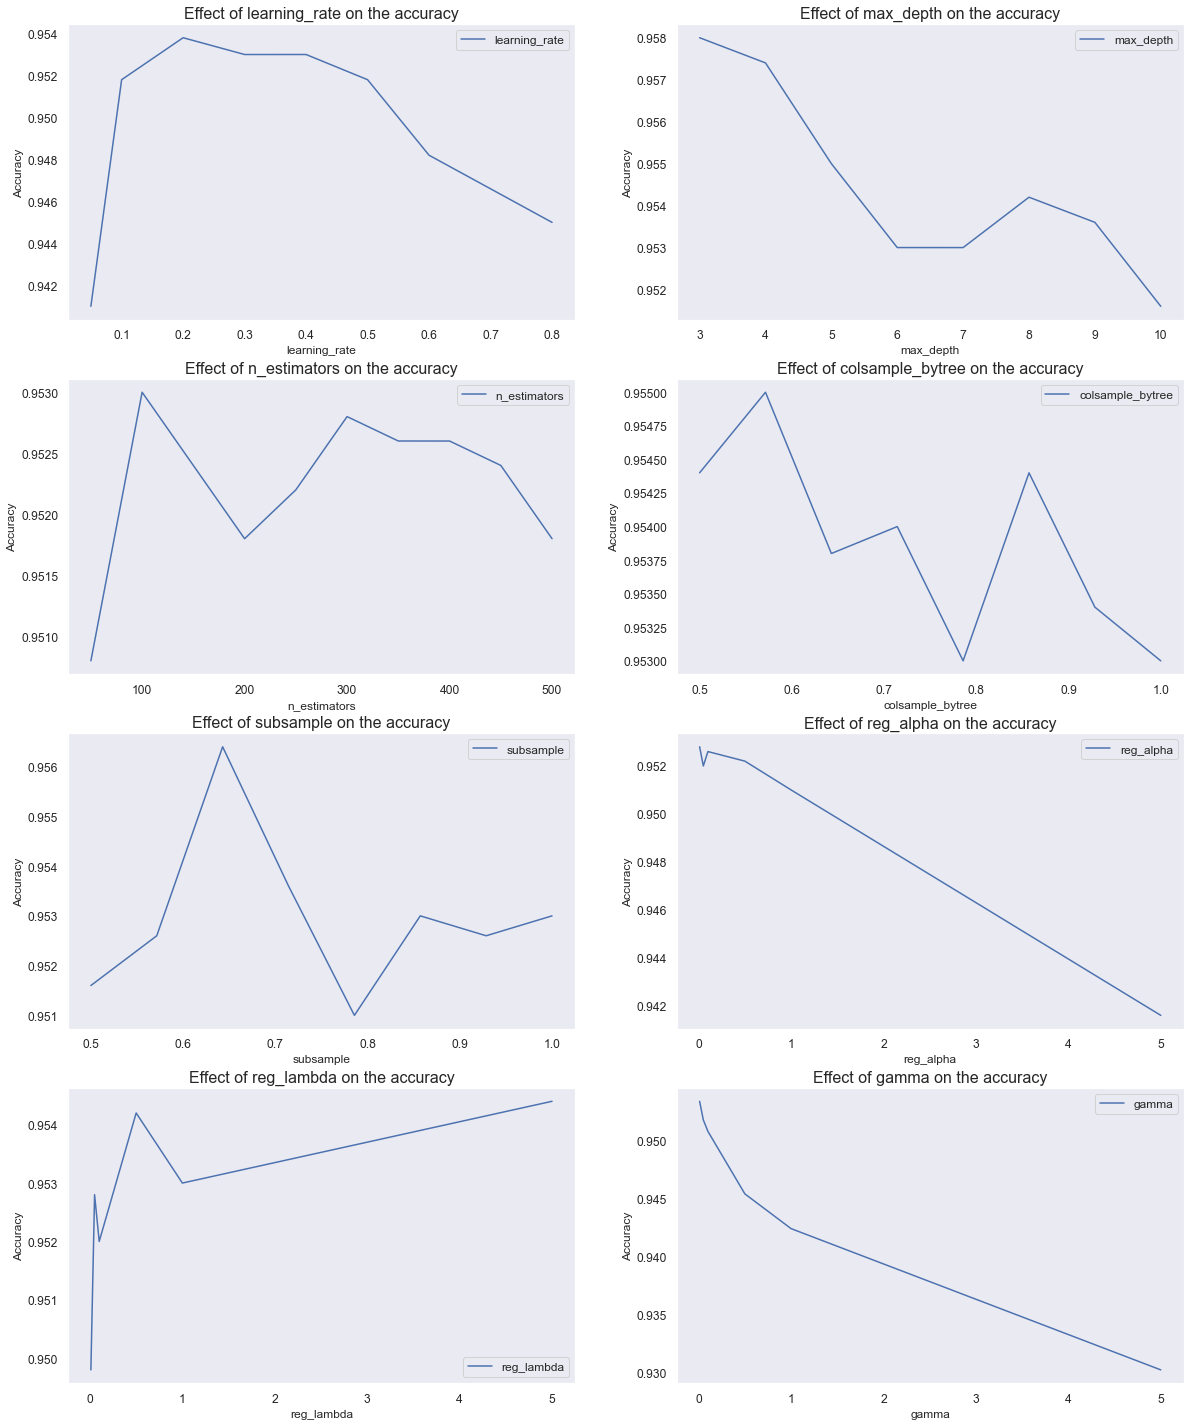

In [ ]:
line_search_plotter(result_dict)

**Evaluation of the results:**
- `learning_rate`: It seems to be the best in the 0.1 - 0.5 range.
- `max_depth`: I would not draw major conclusions regarding max_depth, since there is only 0.006 difference in terms of accuracy between the best and the worst results. Therefore, this complete range shall be included in the grid search.
- `n_estimators`: Again, there is no major difference in the accuracy, consequently a wider range of n_estimators shall be tested later on.
- `colsample_bytree`: Again, there are only small differences, no major conclusion on this.
- `subsample`: Again, there are only small differences, no major conclusion on this.
- `reg_alpha`: There seems to be a clear tendency, that increasing reg_alpha deteriorates the performance of the model. It shall be kept around the default value (0).
- `reg_lambda`: Although it does not have a major impact, increasing the reg_lambda seems to improve the accuracy a little bit.
- `gamma`: Increasing gamma has clearly an unfavourable effect. Therefore I'd avoid doing so.

### Grid search with the limited dataset

Now, that we have identified the parameter ranges, that we should use, a grid search shall be performed to check, what performance we can reach by combining these parameters. The parameters ranges were selected based on the results above.

In [ ]:
gs_params = {
    'learning_rate' : [0.2, 0.5],
    'max_depth' : [3, 7],
    'n_estimators' : [100, 300],
    'colsample_bytree': [0.5, 0.8],
    'subsample': [0.5, 0.8],
    'reg_lambda': [0, 5],
}

In [ ]:
start_time = time.time()

# Create the model used for the grid search
xgb_model = XGBClassifier()

# Set up grid search instance
gs = GridSearchCV(xgb_model, gs_params, cv = kfold, scoring = 'accuracy', verbose = 3)

gs_model = gs.fit(X_limited, y_limited)

end_time = time.time()
total_time_rf = end_time - start_time
print("The grid search took " + str(total_time_rf) + " s.")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.5;, score=0.955 total time=   5.0s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.5;, score=0.958 total time=  12.2s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.5;, score=0.948 total time=  11.4s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.8;, score=0.954 total time=   6.1s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.8;, score=0.951 total time=   4.7s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_lambda=0, subsample=0.8;, score=0.956 total time=   4.8s
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.2, max_dept

In [ ]:
results_df = pd.DataFrame(gs_model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
47,37.187413,2.446903,0.060116,0.002520,0.8,0.2,7,300,5,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.961608,0.958608,0.956182,0.958799,0.002219,1
14,26.287039,0.998248,0.068477,0.010257,0.5,0.2,7,300,5,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.958608,0.956809,0.958583,0.958000,0.000843,2
46,34.259594,1.361566,0.063988,0.009327,0.8,0.2,7,300,5,0.5,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.956209,0.954409,0.961585,0.957401,0.003048,3
13,19.032352,1.085254,0.066244,0.003405,0.5,0.2,7,300,0,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.959808,0.957409,0.954982,0.957400,0.001970,4
43,16.886223,0.143544,0.058395,0.002302,0.8,0.2,7,100,5,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.959208,0.959208,0.953782,0.957399,0.002558,5
7,21.048322,1.191639,0.071701,0.000252,0.5,0.2,3,300,5,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.953209,0.959808,0.958583,0.957200,0.002866,6
39,30.876443,1.606101,0.075944,0.011800,0.8,0.2,3,300,5,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.958608,0.959208,0.953782,0.957199,0.002429,7
15,28.127586,1.292244,0.074008,0.011268,0.5,0.2,7,300,5,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.960408,0.958608,0.952581,0.957199,0.003347,8
6,21.435219,1.350191,0.068310,0.009260,0.5,0.2,3,300,5,0.5,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.956209,0.953209,0.959784,0.956401,0.002687,9
33,10.425079,0.278765,0.059002,0.006831,0.8,0.2,3,100,0,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.953809,0.958008,0.957383,0.956400,0.001850,10


#### Grid search results

**Conclusion:**

- The best accuracy was always achieved with a `learning_rate` value of 0.2 (lowest value of the interval), which makes me think, that `learning_rate` shall be reduced.
- Higher `max_depth` seems to be more benefitial.
- Higher `colsample_bytree` again seems to be a bit better.
- `n_estimator` and `reg_lambda` shall also be higher.

Let's make a new iteration with tuned parameters, taken into account the statements above.

In [ ]:
gs_params = {
    'learning_rate' : [0.1, 0.2, 0.3],
    'max_depth' : [4, 7, 10],
    'n_estimators' : [300],
    'colsample_bytree': [0.8, 0.9],
    'subsample': [0.8],
    'reg_lambda': [0, 5, 10, 15],
}

In [ ]:
start_time = time.time()

# Create the model used for the grid search
xgb_model = XGBClassifier()

# Set up grid search instance
gs = GridSearchCV(xgb_model, gs_params, cv = kfold, scoring = 'accuracy', verbose = 3)

gs_model = gs.fit(X_limited, y_limited)

end_time = time.time()
total_time_rf = end_time - start_time
print("The grid search took " + str(total_time_rf) + " s.")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.959 total time=  33.0s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.959 total time=  24.8s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.954 total time=  22.3s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=5, subsample=0.8;, score=0.957 total time=  27.0s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=5, subsample=0.8;, score=0.957 total time=  31.3s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=300, reg_lambda=5, subsample=0.8;, score=0.954 total time=  43.5s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_dept

In [ ]:
results_df = pd.DataFrame(gs_model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
19,50.926183,2.239782,0.071906,0.002430,0.8,0.2,7,300,15,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.962807,0.960408,0.958583,0.960600,0.001730,1
45,81.551233,2.942234,0.103039,0.004748,0.9,0.1,10,300,5,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.961008,0.959208,0.958583,0.959600,0.001028,2
22,43.397842,2.003652,0.069324,0.007929,0.8,0.2,10,300,10,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.962208,0.958008,0.958583,0.959600,0.001859,2
18,50.018353,2.033733,0.094301,0.013877,0.8,0.2,7,300,10,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.961608,0.957409,0.959184,0.959400,0.001721,4
47,95.419881,4.013955,0.098001,0.012025,0.9,0.1,10,300,15,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.960408,0.959208,0.957383,0.959000,0.001244,5
30,39.138689,1.706407,0.069895,0.008802,0.8,0.3,7,300,10,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.3...",0.959808,0.959208,0.957383,0.958800,0.001031,6
70,46.203250,2.153382,0.068318,0.005457,0.9,0.3,10,300,10,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.3...",0.961008,0.958608,0.956783,0.958800,0.001730,7
9,57.128870,1.936423,0.076004,0.004798,0.8,0.1,10,300,5,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.961608,0.958008,0.956783,0.958800,0.002048,7
23,47.393464,2.677024,0.074154,0.007084,0.8,0.2,10,300,15,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.961608,0.958008,0.956783,0.958800,0.002048,7
17,43.298773,3.271613,0.071960,0.011884,0.8,0.2,7,300,5,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.961608,0.958608,0.956182,0.958799,0.002219,10


**Now let's try out the performance on the full dataset:**

In [ ]:
start_time = time.time()
model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.2, max_depth = 10, n_estimators = 300, reg_lambda = 15, subsample = 0.8)
cv_results = cross_validate(model, X_train, y_train, scoring = 'accuracy', cv = kfold, verbose = 3)
cv_accuracy = cv_results['test_score'].mean()
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with optimized configuration using CV took " + str(total_time_rf) + " s.")
print(f'The obtained accuracy is {cv_accuracy}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.984 total time=12.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.1min remaining:    0.0s


[CV] END ......................................., score=0.985 total time=11.8min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.0min remaining:    0.0s


[CV] END ......................................., score=0.983 total time=11.3min
Training of the XGBoost with optimized configuration using CV took 2114.8018860816956 s.
The obtained accuracy is 0.9838333333333332


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 35.2min finished


**Conclusions:**

The results are disappointing. Without any hyperparameter tuning, the obtained accuracy was ***0.98298*** and with and exhaustive hyperparameter tuning I got ***0.98383***. So there was only a very minor improvement.

#### Way forward

There was only a marginal improvement compared to the default parameters, when I did the hyperparameter tuning on the reduced dataset. My conjecture is, that it was a mistake to use only the portion of the data and that might have made the difference.

Since the random search did not work out for me very well, I do not see any other options than to do a line search for the ***complete dataset*** and try to find the most appropriate parameters with a grid search afterwards.

### Line search with the complete dataset

In [ ]:
linsearch_dict = {
    'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.5, 0.8],
    'max_depth' : range(3,9,1),
    'n_estimators' : range(100,501,100),
    'colsample_bytree': np.linspace(0.3, 1, 5),
    'subsample': np.linspace(0.3, 1, 5),
    'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1, 5],
    'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1, 5],
    'gamma': [0.01, 0.1, 5, 50]
}

In [ ]:
result_dict = line_search(X_train, y_train, linsearch_dict)
print(result_dict)

{'learning_rate': [[0.05, 0.9678125], [0.1, 0.9771875], [0.2, 0.9819583333333334], [0.3, 0.9829791666666666], [0.5, 0.9824166666666666], [0.8, 0.9799791666666667]], 'max_depth': [[3, 0.9756666666666667], [4, 0.9811666666666666], [5, 0.9824166666666668], [6, 0.9829791666666666], [7, 0.983], [8, 0.9824791666666667]], 'n_estimators': [[100, 0.9829791666666666], [200, 0.98375], [300, 0.9839375], [400, 0.9838958333333334], [500, 0.9836874999999999]], 'colsample_bytree': [[0.3, 0.9834999999999999], [0.475, 0.9836458333333334], [0.6499999999999999, 0.9827499999999999], [0.825, 0.9827083333333334], [1.0, 0.9829791666666666]], 'subsample': [[0.3, 0.9805000000000001], [0.475, 0.9815833333333334], [0.6499999999999999, 0.9824583333333333], [0.825, 0.9831458333333334], [1.0, 0.9829791666666666]], 'reg_alpha': [[0.01, 0.9828541666666667], [0.05, 0.9826250000000001], [0.1, 0.9827291666666667], [0.5, 0.9822916666666667], [1, 0.9817083333333333], [5, 0.9785833333333334]], 'reg_lambda': [[0.01, 0.982895

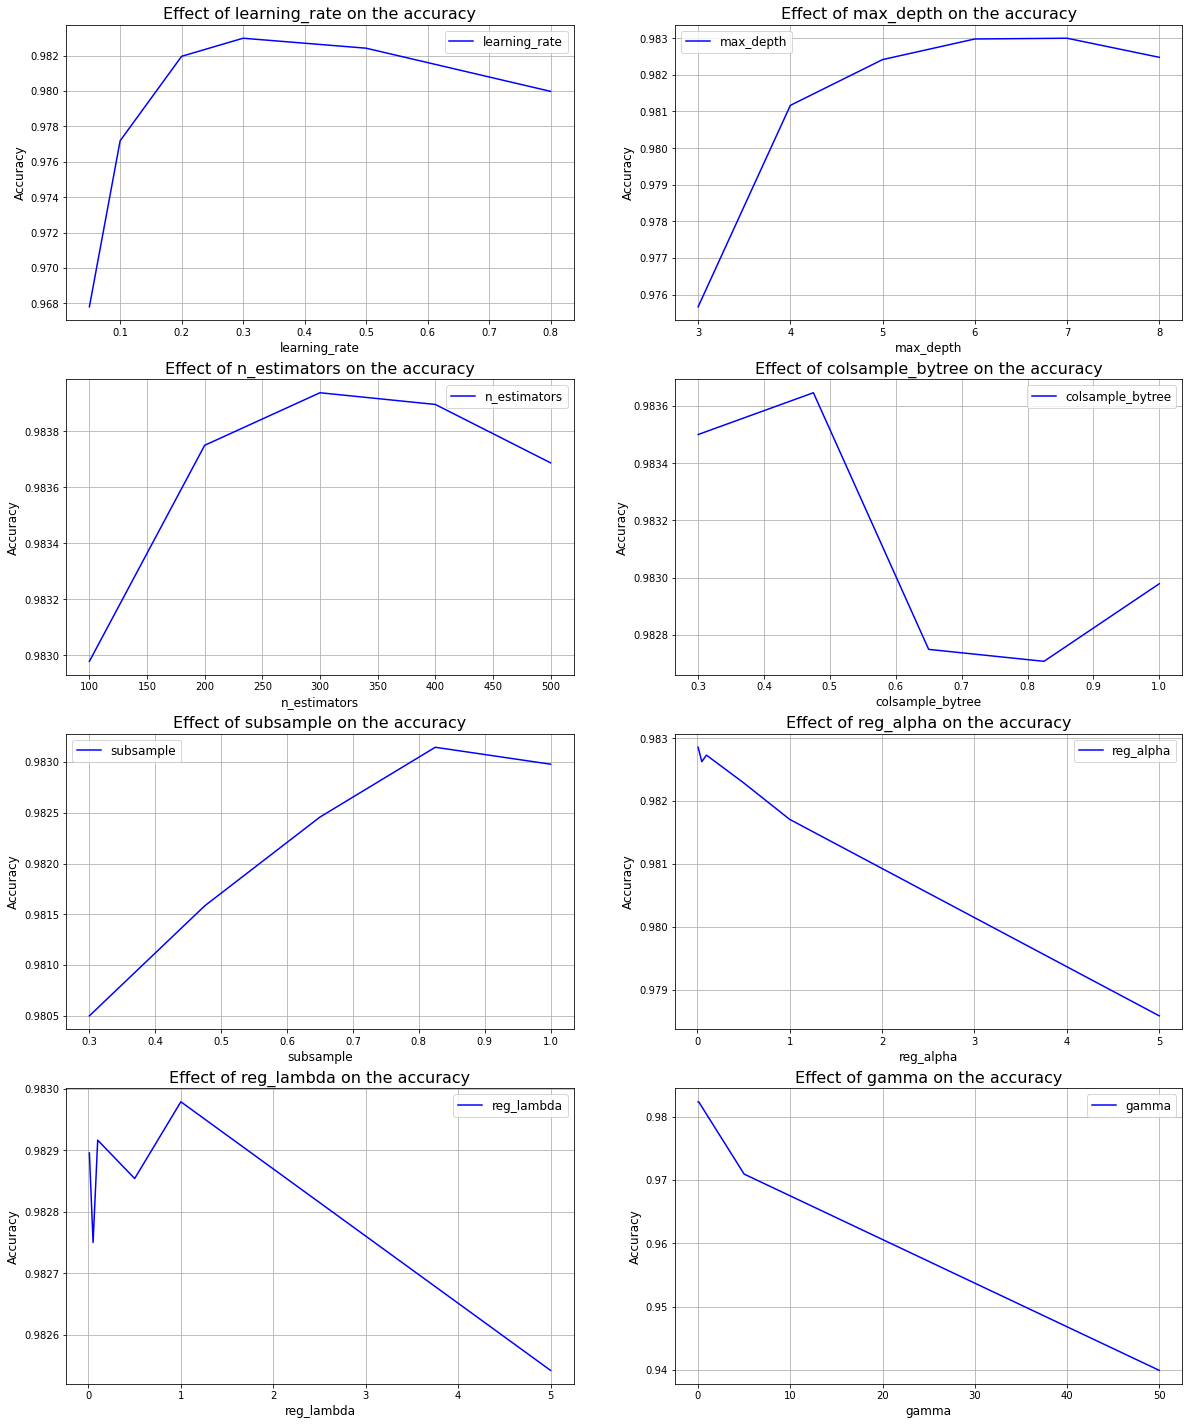

In [ ]:
line_search_plotter(result_dict)

#### Line search results

**Evaluation of the results obtained on the full dataset:**
- `learning_rate`: It seems to be the best in the 0.1 - 0.5 range (same as before)
- `max_depth`: It seems to be the most benefitial, if `max_depth` is set to 6-7.
- `n_estimators`: 300 appears to be the best value.
- `colsample_bytree`: Again, there are only small differences, no major conclusion on this.
- `subsample`: Shall be kept around 0.8.
- `reg_alpha`: There seems to be a clear tendency, that increasing `reg_alpha` deteriorates the performance of the model. It shall be kept around the default value (0).
- `reg_lambda`: Shall be kept around 0 - 1.
- `gamma`: Increasing gamma has clearly an unfavourable effect. Therefore I'd avoid doing so in the grid search. I'll keep this at default 0.

### Grid search with the full dataset

Let's perform the grid search again with these new parameters on the full dataset.

In [ ]:
gs_params = {
    'learning_rate' : [0.3, 0.4, 0.5],
    'max_depth' : [6, 7],
    'n_estimators' : [300],
    'colsample_bytree': [0.5, 1],
    'subsample': [0.6, 0.8],
    'reg_lambda': [0, 1],
}

In [ ]:
start_time = time.time()

# Create the model used for the grid search
xgb_model = XGBClassifier()

# Set up grid search instance
gs = GridSearchCV(xgb_model, gs_params, cv = kfold, scoring = 'accuracy', verbose = 3)

gs_model = gs.fit(X_train, y_train)

end_time = time.time()
total_time_rf = end_time - start_time
print("The grid search took " + str(total_time_rf) + " s.")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.6;, score=0.984 total time= 4.0min
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.6;, score=0.984 total time= 4.2min
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.6;, score=0.982 total time= 4.1min
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.984 total time= 3.8min
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.984 total time= 3.8min
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, reg_lambda=0, subsample=0.8;, score=0.983 total time= 3.8min
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.3, max_dept

In [ ]:
results_df = pd.DataFrame(gs_model.cv_results_)
results_df.sort_values(by = ["rank_test_score"]).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
27,459.492045,1.775734,0.338477,0.008095,1,0.3,6,300,1,0.8,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.984250,0.984250,0.983187,0.983896,0.000501,1
25,410.200723,2.856737,0.330637,0.009885,1,0.3,6,300,0,0.8,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.983875,0.984313,0.983000,0.983729,0.000546,2
1,227.656362,0.489368,0.365916,0.045414,0.5,0.3,6,300,0,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.983812,0.984187,0.983000,0.983667,0.000496,3
3,257.169802,2.157133,0.336397,0.010000,0.5,0.3,6,300,1,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.983313,0.984500,0.982812,0.983542,0.000708,4
5,232.870718,1.061412,0.341757,0.054139,0.5,0.3,7,300,0,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.984062,0.983563,0.983000,0.983542,0.000434,4
7,263.468053,7.008074,0.351515,0.034037,0.5,0.3,7,300,1,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.984125,0.984062,0.982187,0.983458,0.000899,6
35,461.353408,20.754640,0.349435,0.022080,1,0.4,6,300,1,0.8,"{'colsample_bytree': 1, 'learning_rate': 0.4, ...",0.984062,0.984437,0.981688,0.983396,0.001218,7
11,224.898235,0.879952,0.310533,0.019015,0.5,0.4,6,300,1,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.4...",0.983563,0.983875,0.982250,0.983229,0.000704,8
0,245.971951,6.267414,0.312266,0.012159,0.5,0.3,6,300,0,0.6,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.984000,0.983625,0.981688,0.983104,0.001013,9
26,486.994080,5.319404,0.342205,0.016969,1,0.3,6,300,1,0.6,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.983938,0.983125,0.982250,0.983104,0.000689,9


#### Grid search results

**Conclusion:**

Again, the results are disappointing. After spending 59149 sec on performing the grid search (16 hours 26 mins), the accuracy with the best parameter combination is almost identical to the one, that we have got on the limited dataset.

- Accuracy on the full dataset: 0.983896 (grid search took 16 hours and 21 mins)
- Accuracy on the limited dataset: 0.9838333 (grid search took 2 hours and 51 mins)

This leads me to the following conclusion:
- Either the default parameters are very close the the optimal ones and there is hardly any chance to improve the performance of the xgboost model, or I've chosen the wrong parameters to tune/ maybe an important parameter was missed.

Regardless, since I've ran out of time, I will hand in the model, that had the best performance above:



```
colsample_bytree = 1
learning_rate = 0.3
max_depth = 6
n_estimators = 300
reg_lambda = 1
subsample = 0.8

```

# Generating the final model

In [ ]:
start_time = time.time()
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.3, max_depth = 6,
                      n_estimators = 300, reg_lambda = 1, subsample = 0.8)
model.fit(X_train, y_train)
end_time = time.time()
total_time_rf = end_time - start_time
print("Training of the XGBoost with optimized parameters took " + str(total_time_rf) + " s.")
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))

Training of the XGBoost with optimized parameters took 708.6704478263855 s.
0.9863333333333333


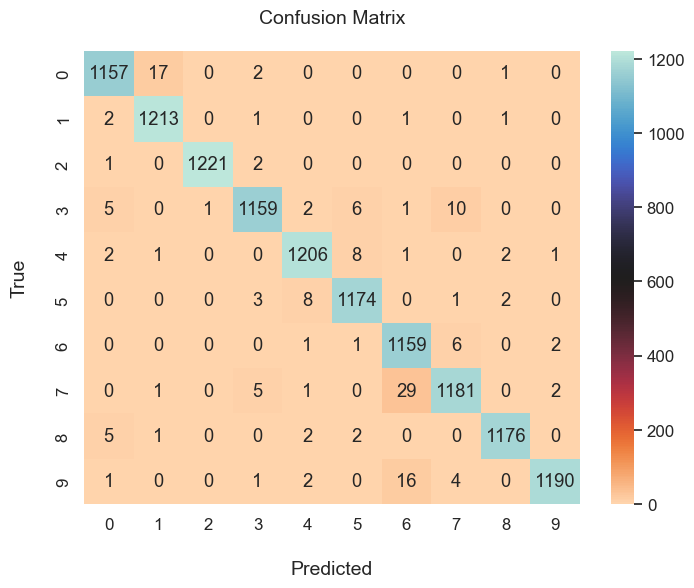

In [ ]:
# Calculating the confusion matrix:
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6), dpi=100)
sns.set_context("talk")
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="icefire_r")
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("True", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()

# Generating the submission files

## Saving the model

In [ ]:
model.save_model('xgboost_v1.txt')

## Predictions on the test data

In [ ]:
ids, test_set = test_df.id, test_df.drop(['id'], axis = 1)

In [ ]:
final_preds = model.predict(test_set)

In [ ]:
pd.Series(final_preds, index = ids, name = 'label').to_csv('submission.csv')